# Desafio  Cientista de Dados


Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema. O uso de outras fontes de dados além do dataset é permitido (e encorajado).


## Importando Bibliotecas

In [555]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error



Versão do Python utilizada

In [556]:
from platform import python_version
print('Versão Python:', python_version())

Versão Python: 3.13.1


## Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!


# Dicionário dos dados

**id** – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo

**nome** - Representa o nome do anúncio

**host_id** - Representa o id do usuário que hospedou o anúncio

**host_name**– Contém o nome do usuário que hospedou o anúncio

**bairro_group** - Contém o nome do bairro onde o anúncio está localizado

**bairro** - Contém o nome da área onde o anúncio está localizado

**latitude** - Contém a latitude do local

**longitude** - Contém a longitude do local

**room_type**– Contém o tipo de espaço de cada anúncio
**price**- Contém o preço por noite em dólares listado pelo anfitrião

**minimo_noites** - Contém o número mínimo de noites que o usuário deve reservar

**numero_de_reviews** - Contém o número de comentários dados a cada listagem

**ultima_review**- Contém a data da última revisão dada à listagem

**reviews_por_mes**- Contém o número de avaliações fornecidas por mês

**calculado_host_listings_count** - Contém a quantidade de listagem por host

**disponibilidade_365** - Contém o número de dias em que o anúncio está disponível para reserva


In [557]:
# Importando o dataset e verificando as primeiras linhas
df = "teste_indicium_precificacao.csv"
dataset = pd.read_csv(df)
dataset.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [558]:
# Mostrando as colunas do dataset
dataset.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [559]:
# Verificando a quantidade de linhas e colunas do dataset
dataset.shape

(48894, 16)

In [560]:
# Verificando o nome das colunas, valores não nulos e o tipo de dado de cada coluna
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [561]:
# Mostra a quantidade de valores ausentes em cada coluna do dataset
dataset.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [562]:
# Mostra estatísticas resumo das colunas numéricas do dataset
dataset.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [563]:
# Substituir os valores ausentes no dataset
dataset = dataset.fillna(0)

In [564]:
# Verificar se há valores ausentes em cada célula do dataset.
dataset.isnull()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [565]:
# Conta o número de itens em cada grupo de 'bairro_group
dataset.groupby(['bairro_group']).size()

bairro_group
Bronx             1091
Brooklyn         20103
Manhattan        21661
Queens            5666
Staten Island      373
dtype: int64

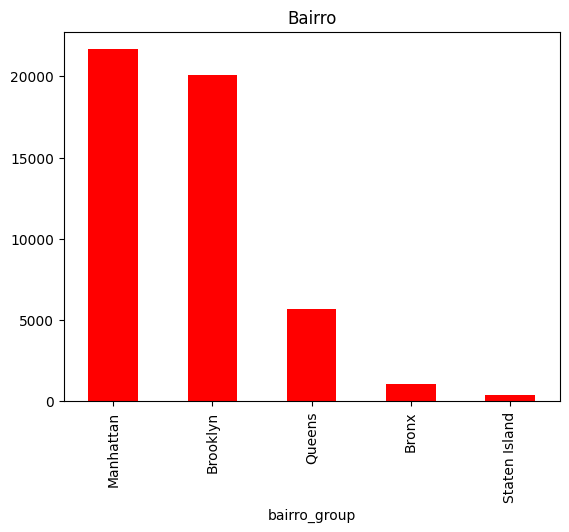

In [566]:
dataset.bairro_group.value_counts().plot(kind='bar', title='Bairro', color='red')
plt.show()

In [567]:
# Quantidade de cada tipo de quarto existente do dataset
dataset.groupby(['room_type']).size()

room_type
Entire home/apt    25409
Private room       22325
Shared room         1160
dtype: int64

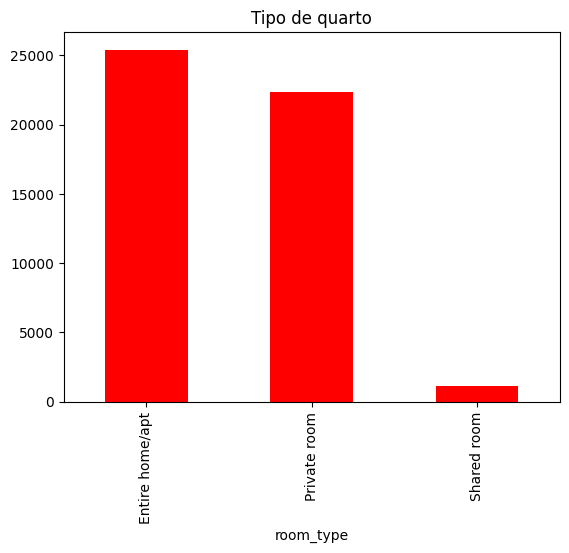

In [568]:
dataset.room_type.value_counts().plot(kind='bar', title='Tipo de quarto', color='red')
plt.show()

In [569]:
# Quantidade de valores na coluna price
dataset.groupby(['price']).size()

price
0        11
10       17
11        3
12        4
13        1
         ..
7703      1
8000      1
8500      1
9999      3
10000     3
Length: 674, dtype: int64

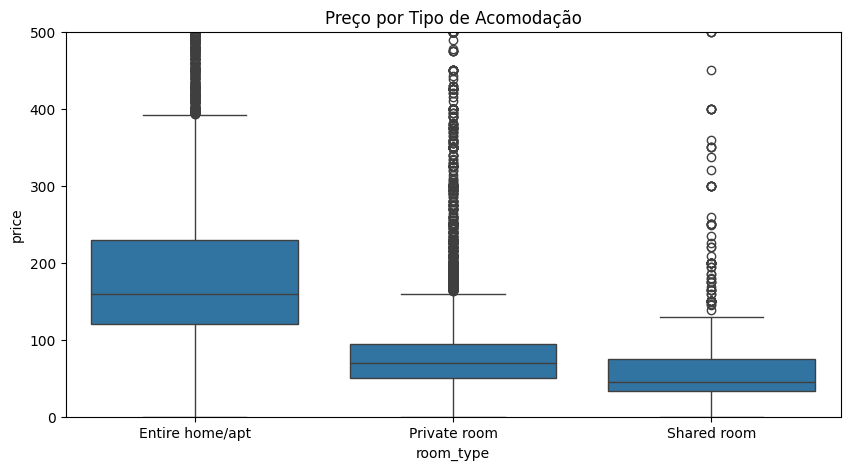

In [570]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='room_type', y='price', data=dataset)
plt.title("Preço por Tipo de Acomodação")
plt.ylim(0, 500)
plt.show()

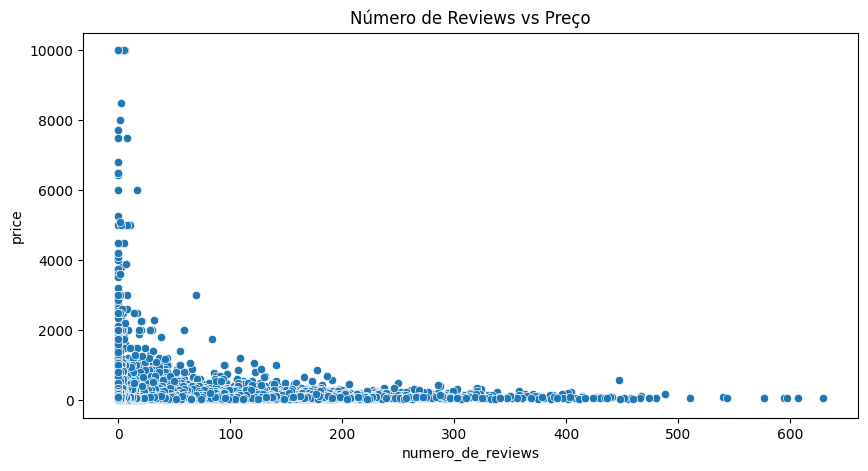

In [571]:
# Gráfico do número de reviews vs o preço
plt.figure(figsize=(10, 5))
sns.scatterplot(x='numero_de_reviews', y='price', data=dataset)
plt.title("Número de Reviews vs Preço")
plt.show()

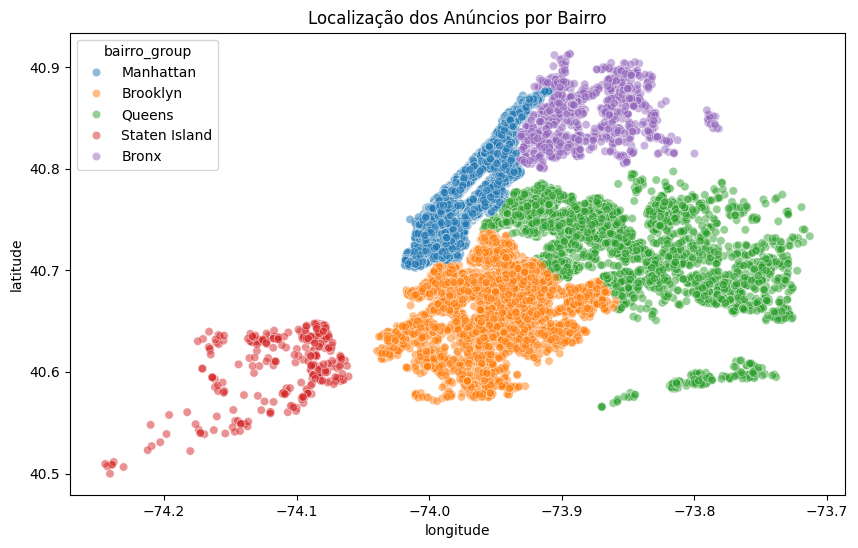

In [572]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['longitude'], y=dataset['latitude'], hue=dataset['bairro_group'], alpha=0.5)
plt.title("Localização dos Anúncios por Bairro")
plt.show()

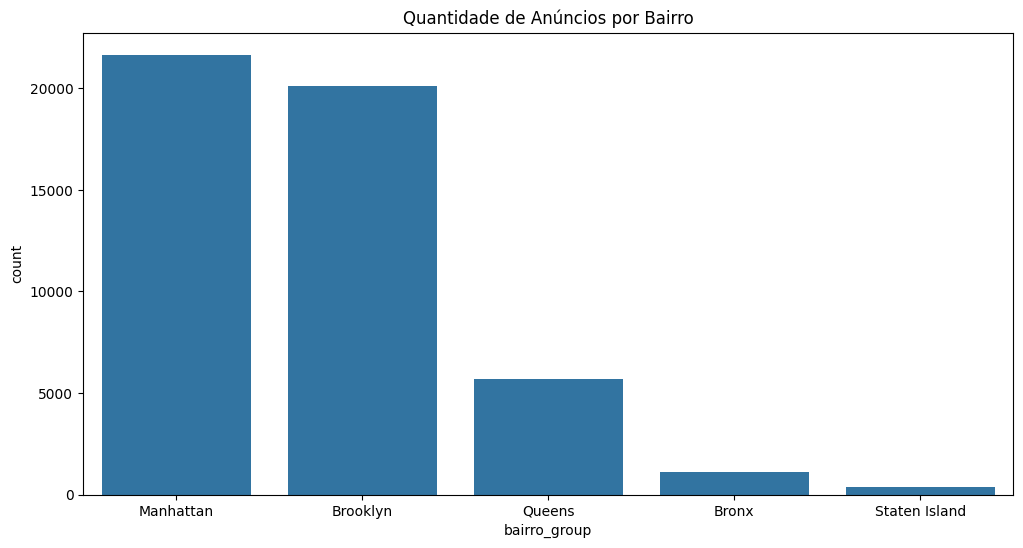

In [573]:
# Contagem de anúncios por bairro
plt.figure(figsize=(12, 6))
sns.countplot(x='bairro_group', data=dataset, order=dataset['bairro_group'].value_counts().index)
plt.title("Quantidade de Anúncios por Bairro")
plt.show()

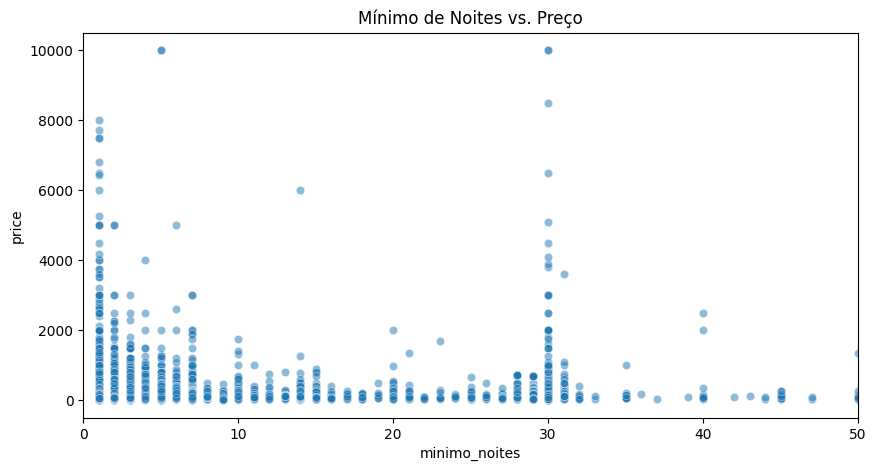

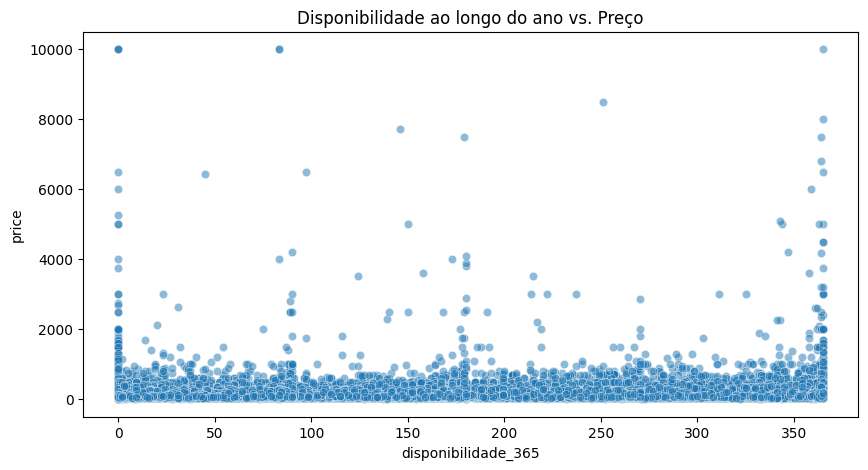

In [574]:
# Mínimo de noites vs Preço
plt.figure(figsize=(10, 5))
sns.scatterplot(x=dataset['minimo_noites'], y=dataset['price'], alpha=0.5)
plt.xlim(0, 50)
plt.title("Mínimo de Noites vs. Preço")
plt.show()

# Disponibilidade ao longo do ano vs. Preço
plt.figure(figsize=(10, 5))
sns.scatterplot(x=dataset['disponibilidade_365'], y=dataset['price'], alpha=0.5)
plt.title("Disponibilidade ao longo do ano vs. Preço")
plt.show()


## Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

O mais indicado para investir é em um apartamento em Staten Island, porque segundo o gráfico é o local com maior preço médio por bairro.

In [575]:
# Filtra o dataset para mostrar os imóveis do tipo 'Entire home/apt', seleciona as colunas de interesse e ordena por preço em ordem decrescente.
bairro_apt = dataset.loc[dataset.iloc[:, 8] == 'Entire home/apt', dataset.columns[[4, 5,9]]].sort_values(by='price', ascending=False)

In [576]:
bairro_apt

,bairro_group,bairro,price
29237,Manhattan,Upper West Side,10000
17691,Brooklyn,Greenpoint,10000
6529,Manhattan,East Harlem,9999
40432,Manhattan,Lower East Side,9999
30267,Manhattan,Tribeca,8500
...,...,...,...
35600,Brooklyn,Bedford-Stuyvesant,10
2859,Manhattan,East Village,10
32809,Brooklyn,Sunset Park,10
25777,Brooklyn,Williamsburg,0


In [577]:
# Agrupa os dados buscando pelo índice da coluna, bairro_group, bairro,
# calcula a média do preço para cada grupo, e ordena os bairros pelos preços médios em ordem decrescente.
bairros_mais_caros=bairro_apt.groupby([bairro_apt.columns[0], bairro_apt.columns[1]])[bairro_apt.columns[2]].mean().reset_index().sort_values(by=bairro_apt.columns[2], ascending=False)

In [578]:
bairros_mais_caros

,bairro_group,bairro,price
183,Staten Island,Fort Wadsworth,800.000000
215,Staten Island,Woodrow,700.000000
200,Staten Island,Randall Manor,651.000000
86,Brooklyn,Sea Gate,649.400000
119,Manhattan,Tribeca,561.818182
...,...,...,...
185,Staten Island,Grant City,71.750000
34,Bronx,Soundview,70.000000
45,Bronx,Woodlawn,65.500000
182,Staten Island,Emerson Hill,63.500000


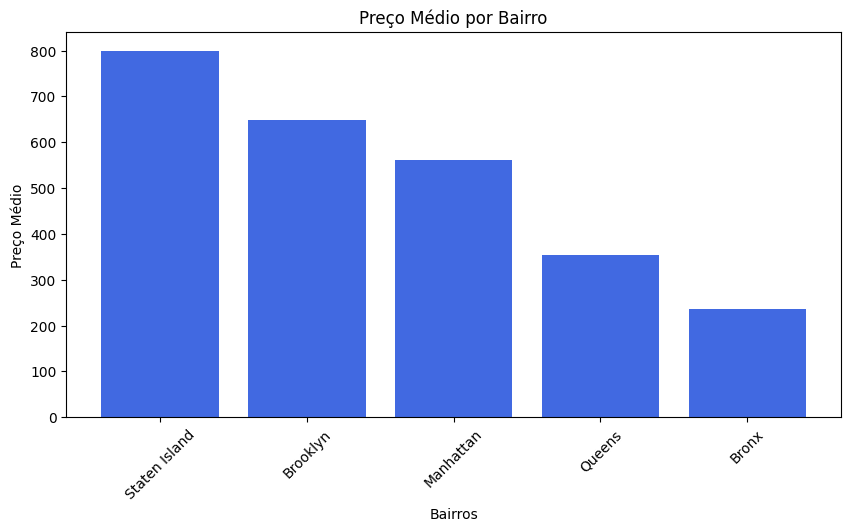

In [579]:
plt.figure(figsize=(10, 5))
plt.bar(bairros_mais_caros[bairro_apt.columns[0]],bairros_mais_caros[bairro_apt.columns[2]], color='royalblue')

plt.xlabel("Bairros")
plt.ylabel("Preço Médio")
plt.title("Preço Médio por Bairro")
plt.xticks(rotation=45)

plt.show()

## O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

As correlações entre as variáveis são bem baixas:

Mínimo de noites e preço: 0.0428 (próxima de zero, indica uma correlação muito fraca).
Disponibilidade e preço: 0.0818 (também uma correlação muito fraca).
Mínimo de noites e disponibilidade: 0.1443 (ainda considerada fraca, mas um pouco mais alta).

Esses valores sugerem que não há correlação forte entre o preço, o número mínimo de noites e a disponibilidade

Correlação entre preço, mínimo de noites e disponibilidade:
                     minimo_noites  disponibilidade_365     price
minimo_noites             1.000000             0.144320  0.042799
disponibilidade_365       0.144320             1.000000  0.081833
price                     0.042799             0.081833  1.000000


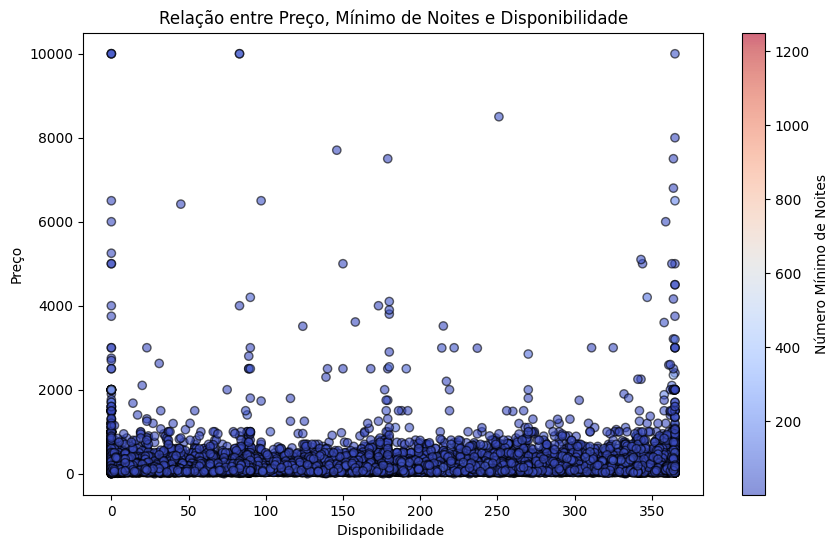

In [580]:
#Mostra a correlação entre o preço, o número mínimo de noites e a disponibilidade anual, indicando a relação entre essas variáveis.
df_relacao =dataset[[dataset.columns[10],dataset.columns[15], dataset.columns[9]]].dropna()

#correlação entre as colunas
correlacao = df_relacao.corr()
print("Correlação entre preço, mínimo de noites e disponibilidade:")
print(correlacao)

#gráfico de dispersão com cores representando a disponibilidade
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_relacao[df_relacao.columns[1]], df_relacao[df_relacao.columns[2]],
                      c=df_relacao[df_relacao.columns[0]], cmap='coolwarm', alpha=0.6, edgecolors="k")

cbar = plt.colorbar(scatter)
cbar.set_label("Número Mínimo de Noites")


plt.xlabel("Disponibilidade ")
plt.ylabel("Preço")
plt.title("Relação entre Preço, Mínimo de Noites e Disponibilidade")
plt.xscale("linear")


plt.show()

## Existe algum padrão no texto do nome do local para lugares de mais alto valor?

Não existe um padrão específico,palavras como Luxury aparece com mais frequência sugerindo que imóveis de maior valor muitas das vezes incluem esse termo nos nomes para destacar seu caráter exclusivo.

In [581]:
# Dividi o dataset selecionando apenas a coluna de nome e preço, buscando apenas os 40 mais caros
locais = dataset.iloc[:, [1,9]].sort_values(by='price', ascending=False).head(40)
locais

,nome,price
17691,Luxury 1 bedroom apt. -stunning Manhattan views,10000
29237,1-BR Lincoln Center,10000
9150,Furnished room in Astoria apartment,10000
6529,Spanish Harlem Apt,9999
40432,2br - The Heart of NYC: Manhattans Lower East ...,9999
12341,"Quiet, Clean, Lit @ LES & Chinatown",9999
30267,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500
4376,Film Location,8000
29661,East 72nd Townhouse by (Hidden by Airbnb),7703
42522,70' Luxury MotorYacht on the Hudson,7500


In [582]:
# Selecionei apenas a coluna importante: nome, transformei todas as letras em minúsculas
nome_locais = locais.iloc[:, 0].str.lower()
nome_locais

17691      luxury 1 bedroom apt. -stunning manhattan views
29237                                  1-br lincoln center
9150                   furnished room in astoria apartment
6529                                    spanish harlem apt
40432    2br - the heart of nyc: manhattans lower east ...
12341                  quiet, clean, lit @ les & chinatown
30267    beautiful/spacious 1 bed luxury flat-tribeca/soho
4376                                         film location
29661            east 72nd townhouse by (hidden by airbnb)
42522                  70' luxury motoryacht on the hudson
45665                                 gem of east flatbush
44033                     3000 sq ft daylight photo studio
48042         luxury tribeca apartment at an amazing price
37193                 apartment new york \nhell’s kitchens
3773                      super bowl brooklyn duplex apt!!
29663            park avenue mansion by (hidden by airbnb)
3536                    uws 1br w/backyard + block from 

In [583]:
# Baixei o pacote que é utilizado na tokenização de texto
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [584]:
#Tokeniza o texto da variável 'nome_locais' convertido em string, em palavras, usando o idioma inglês.
word_text = word_tokenize(nome_locais.to_string(),language ='english')
print(word_text)


['17691', 'luxury', '1', 'bedroom', 'apt', '.', '-stunning', 'manhattan', 'views', '29237', '1-br', 'lincoln', 'center', '9150', 'furnished', 'room', 'in', 'astoria', 'apartment', '6529', 'spanish', 'harlem', 'apt', '40432', '2br', '-', 'the', 'heart', 'of', 'nyc', ':', 'manhattans', 'lower', 'east', '...', '12341', 'quiet', ',', 'clean', ',', 'lit', '@', 'les', '&', 'chinatown', '30267', 'beautiful/spacious', '1', 'bed', 'luxury', 'flat-tribeca/soho', '4376', 'film', 'location', '29661', 'east', '72nd', 'townhouse', 'by', '(', 'hidden', 'by', 'airbnb', ')', '42522', '70', "'", 'luxury', 'motoryacht', 'on', 'the', 'hudson', '45665', 'gem', 'of', 'east', 'flatbush', '44033', '3000', 'sq', 'ft', 'daylight', 'photo', 'studio', '48042', 'luxury', 'tribeca', 'apartment', 'at', 'an', 'amazing', 'price', '37193', 'apartment', 'new', 'york', '\\nhell', '’', 's', 'kitchens', '3773', 'super', 'bowl', 'brooklyn', 'duplex', 'apt', '!', '!', '29663', 'park', 'avenue', 'mansion', 'by', '(', 'hidden'

In [585]:
# Baixei o pacote que contém listas de palavras comuns que geralmente são removidas durante o processamento de texto.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vitor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [586]:
# Carrega uma lista de palavras comuns no idioma inglês
stopwordsnltk = nltk.corpus.stopwords.words('english')
print(stopwordsnltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [587]:
# Adiciona novas stopwords à lista de stopwords já existente no NLTK, que são símbolos e pontuações como vírgula, ponto, interrogação, entre outros.
new_stopwords = [',','...','.','?','!','(',')','&','-']
stopwordsnltk.extend(new_stopwords)


In [588]:
# Filtra as palavras de word_text, removendo as que estão na lista de stopwords, e armazena as palavras restantes na lista  new_words.
new_words = []
for word in word_text:
    if word not in stopwordsnltk:
      new_words.append(word)
print(new_words)


['17691', 'luxury', '1', 'bedroom', 'apt', '-stunning', 'manhattan', 'views', '29237', '1-br', 'lincoln', 'center', '9150', 'furnished', 'room', 'astoria', 'apartment', '6529', 'spanish', 'harlem', 'apt', '40432', '2br', 'heart', 'nyc', ':', 'manhattans', 'lower', 'east', '12341', 'quiet', 'clean', 'lit', '@', 'les', 'chinatown', '30267', 'beautiful/spacious', '1', 'bed', 'luxury', 'flat-tribeca/soho', '4376', 'film', 'location', '29661', 'east', '72nd', 'townhouse', 'hidden', 'airbnb', '42522', '70', "'", 'luxury', 'motoryacht', 'hudson', '45665', 'gem', 'east', 'flatbush', '44033', '3000', 'sq', 'ft', 'daylight', 'photo', 'studio', '48042', 'luxury', 'tribeca', 'apartment', 'amazing', 'price', '37193', 'apartment', 'new', 'york', '\\nhell', '’', 'kitchens', '3773', 'super', 'bowl', 'brooklyn', 'duplex', 'apt', '29663', 'park', 'avenue', 'mansion', 'hidden', 'airbnb', '3536', 'uws', '1br', 'w/backyard', '+', 'block', 'cp', '15559', 'luxury', 'townhouse', 'greenwich', 'village', '3719'

In [589]:
#Cria uma distribuição de frequência das palavras em new_words e armazena em fdisk_text, mostrando quantas vezes cada palavra aparece.
fdisk_text = FreqDist(new_words)
fdisk_text


FreqDist({'luxury': 5, 'location': 5, '1': 4, 'apartment': 4, 'bedroom': 3, 'apt': 3, 'nyc': 3, 'east': 3, 'townhouse': 3, 'hidden': 3, ...})

In [590]:
# Exibe as 30 palavras mais comuns e suas respectivas frequências que aparecem .
fdisk_text.most_common(30)

[('luxury', 5),
 ('location', 5),
 ('1', 4),
 ('apartment', 4),
 ('bedroom', 3),
 ('apt', 3),
 ('nyc', 3),
 ('east', 3),
 ('townhouse', 3),
 ('hidden', 3),
 ('airbnb', 3),
 ('park', 3),
 ('private', 3),
 ('manhattan', 2),
 ('furnished', 2),
 ('room', 2),
 ('film', 2),
 ('super', 2),
 ('bowl', 2),
 ('brooklyn', 2),
 ('duplex', 2),
 ('greenwich', 2),
 ('village', 2),
 ('superbowl', 2),
 ('midtown', 2),
 ('2', 2),
 ('beautiful', 2),
 ('space', 2),
 ('west', 2),
 ('garden', 2)]

<Axes: xlabel='Samples', ylabel='Counts'>

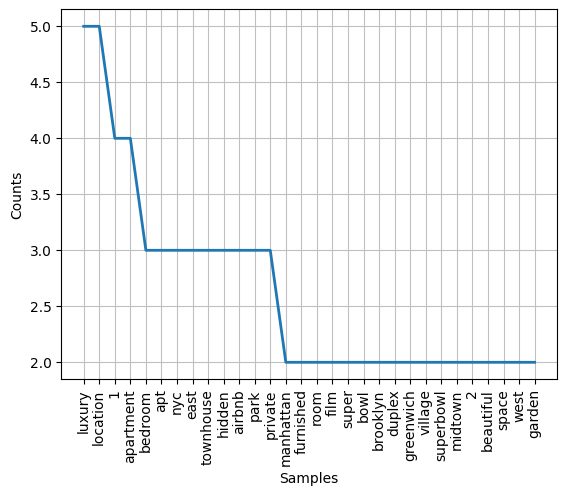

In [591]:
# Gráfico com as 30 palavras mais comuns
fdisk_text.plot(30)

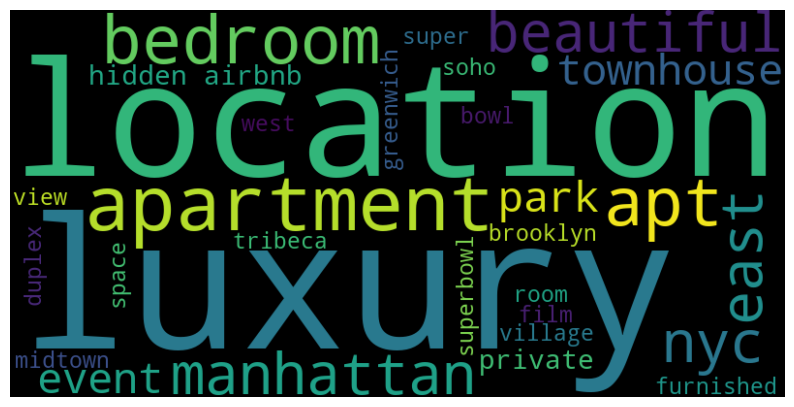

In [592]:
# Gera e exibe uma nuvem de palavras das palavras na lista new_words, mostrando as 30 palavras mais frequentes
def plot_cloud(new_words):
      wordcloud = WordCloud(
      width=800,
      height=400,
      max_words=30,
      ).generate(' '.join(new_words))
      plt.figure(figsize=(10,10))
      plt.imshow(wordcloud,interpolation='bilinear')
      plt.axis('off')
      plt.show()


plot_cloud(new_words)

## Explique como você faria a previsão do preço a partir dos dados. Quaisvariáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

In [593]:
# Exibe os tipos únicos de quartos presentes na coluna room_type.
dataset['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [594]:
# Substitui os valores da coluna room_type por números, de acordo com o mapeamento definido em map_room.
map_room = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room':3
}

dataset['room_type'] = dataset['room_type'].map(map_room)

In [595]:
# Exibe os bairros únicos presentes na coluna bairro_group.
dataset['bairro_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [596]:
# Substitui os nomes únicos presentes na coluna por números, de acordo com o mapeamento definido emm map_bairro_group
map_bairro_group = {
    'Manhattan': 1,
    'Brooklyn' : 2,
    'Queens' : 3 ,
    'Staten Island' : 4,
    'Bronx': 5
}
dataset['bairro_group'] = dataset['bairro_group'].map(map_bairro_group)

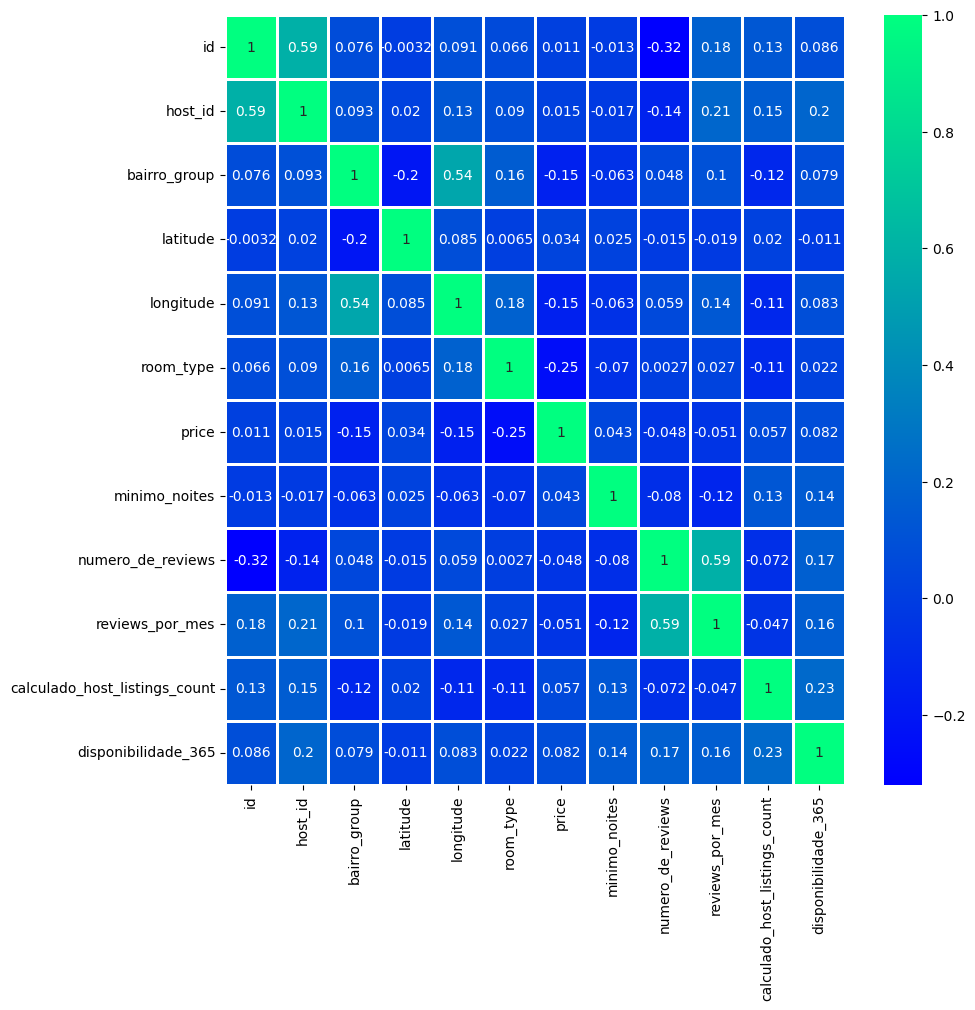

In [597]:
# Remove as colunas nome, host_name, bairro e ultima_review do dataset e exibe um gráfico de
# mapa de calor  para mostrar as correlações entre as variáveis restantes.
dataset_correlacao = dataset.drop(['nome', 'host_name',  'bairro',  'ultima_review'], axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(dataset_correlacao.corr(),linewidth=1,annot=True, cmap="winter")
plt.show()

In [598]:
#Define as variáveis independentes X e dependentes y,  onde 'X' contém as colunas do dataset sem a coluna 'price' e
#'y' contém os valores da coluna price.
X = dataset_correlacao.drop(['price'], axis = 1)
y = dataset_correlacao['price']



In [599]:
#Divide os dados em conjuntos de treino (80%) e teste (20%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [600]:
#Modelo

modelo_linear = LinearRegression()

In [601]:
#Treinando o modelo

modelo_linear.fit(X_train,y_train)

LinearRegression()

In [602]:
#Usa o modelo treinado (modelo_linear) para fazer previsões sobre os dados de teste (X_test) e armazena as previsões em y_pred
y_pred = modelo_linear.predict(X_test)


In [603]:
# Calcula e exibe o erro absoluto médio (MAE) e a raiz do erro quadrático médio (RMSE) entre os valores reais (y_test) e as previsões (y_pred) do modelo.
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'(MAE):{mae:.2f}')
print(f'(RMSE):{rmse:.2f}')

(MAE):71.49
(RMSE):212.38


## Prever preço desse ímovel
{'id': 2595, 'nome': 'Skylit Midtown Castle', 'host_id': 2845, 'host_name': 'Jennifer', 'bairro_group': 'Manhattan', 'bairro': 'Midtown', 'latitude': 40.75362, 'longitude': -73.98377, 'room_type': 'Entire home/apt', 'price': 225, 'minimo_noites': 1, 'numero_de_reviews': 45, 'ultima_review': '2019-05-21', 'reviews_por_mes': 0.38, 'calculado_host_listings_count': 2, 'disponibilidade_365': 355}

In [604]:
# Características do imóvel para previsão
caracteristicas_imovel = [[2595, 2845,1,40.75362,-73.98377, 1,1, 45, 0.38,2,355]]

# previsão usando o modelo treinado
previsaolinear = modelo_linear.predict(caracteristicas_imovel)

previsao_arredondada = round(previsaolinear[0], 2)
print(f"Preço previsto do imóvel: {previsao_arredondada}")

Preço previsto do imóvel: 279.44


c:\Users\vitor\Documents\Estudos\Projeto\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


RandomForestRegressor

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train,y_train)
y_pred1 = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")


RMSE: 212.3796


In [606]:
# Características do imóvel para previsão
caracteristicas_imovel = [[2595, 2845,1,40.75362,-73.98377, 1,1, 45, 0.38,2,355]]

#  previsão usando o modelo treinado
previsaorandom = model.predict(caracteristicas_imovel)

previsao_arredondada2 = round(previsaorandom[0], 2)
print(f"Preço previsto do imóvel: {previsao_arredondada2}")

Preço previsto do imóvel: 250.24


c:\Users\vitor\Documents\Estudos\Projeto\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Salvando o modelo


In [608]:
import pickle

with open('LH_CD_VITÓRIA_SILVA.pkl', 'wb') as arq:
    pickle.dump(model, arq)